<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/multiple_lnr_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/petrol_consumption (1).csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [4]:
data.shape

(48, 5)

In [5]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


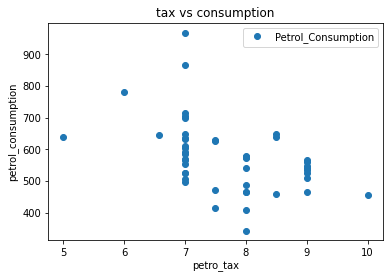

In [6]:
# ploting btwn petrol tax vs petrol consumption
import matplotlib.pyplot as plt
data.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.xlabel('petro_tax')
plt.ylabel('petrol_consumption')
plt.title('tax vs consumption')
plt.show()

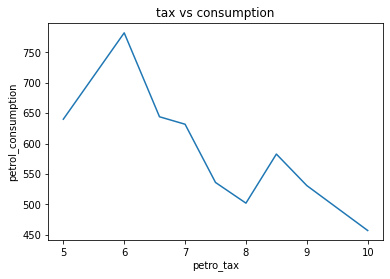

In [7]:
# since the plot has many overlaped values cause petrol tax column has more unique vals we will be plotting based on the average
data.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.xlabel('petro_tax')
plt.ylabel('petrol_consumption')
plt.title('tax vs consumption')
plt.show()

from the above plot we found that when there is a increase in the tax percentage then there is a decrease in the petrol usage


In [8]:
data[["Petrol_tax","Petrol_Consumption"]].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


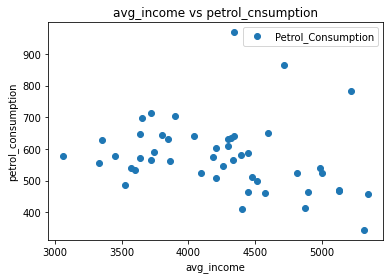

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [9]:
# plotting the second feature and target val
data.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.xlabel('avg_income')
plt.ylabel('petrol_consumption')
plt.title('avg_income vs petrol_cnsumption')
plt.show()
# checking with pearson correlation
data[['Average_income','Petrol_Consumption']].corr()

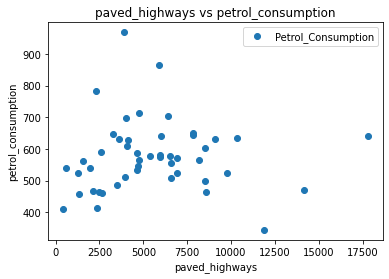

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


In [10]:
# plotting third feature and target val
data.plot(x='Paved_Highways', y='Petrol_Consumption', style='o')
plt.xlabel('paved_highways')
plt.ylabel('petrol_consumption')
plt.title('paved_highways vs petrol_consumption')
plt.show()
# checking with the pearson correlation
data[['Paved_Highways', 'Petrol_Consumption']].corr() 

since there is no linear releation we are going to transform the feature target

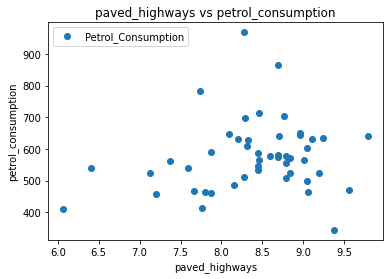

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [11]:
data['transformed'] = np.log((data['Paved_Highways']))
data.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.xlabel('paved_highways')
plt.ylabel('petrol_consumption')
plt.title('paved_highways vs petrol_consumption')
plt.show()
# checking with the pearson correlation
data[['transformed', 'Petrol_Consumption']].corr() 

since log has more near linear releation values than any other transformation we going to consider this as a linear realeation

In [12]:
data = data.drop(columns=['Paved_Highways'])
data.head()

,Petrol_tax,Average_income,Population_Driver_licence(%),Petrol_Consumption,transformed
0,9.0,3571,0.525,541,7.588830
1,9.0,4092,0.572,524,7.130899
2,9.0,3865,0.580,561,7.368970
3,7.5,4870,0.529,414,7.762596
4,8.0,4399,0.544,410,6.066108


In [13]:
data.columns = data.columns.str.replace('transformed', 'log_pavedhighways')
data.head()

,Petrol_tax,Average_income,Population_Driver_licence(%),Petrol_Consumption,log_pavedhighways
0,9.0,3571,0.525,541,7.588830
1,9.0,4092,0.572,524,7.130899
2,9.0,3865,0.580,561,7.368970
3,7.5,4870,0.529,414,7.762596
4,8.0,4399,0.544,410,6.066108


In [14]:
a = data.pop('log_pavedhighways')
data.insert(2,'log_pavedhighways',a)
data.head()

,Petrol_tax,Average_income,log_pavedhighways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,7.588830,0.525,541
1,9.0,4092,7.130899,0.572,524
2,9.0,3865,7.368970,0.580,561
3,7.5,4870,7.762596,0.529,414
4,8.0,4399,6.066108,0.544,410


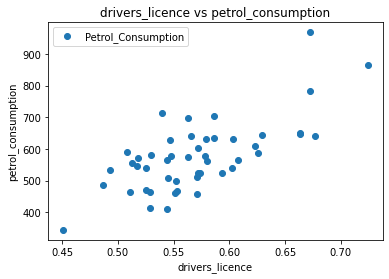

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [15]:
# taking the four'th feature and plotting with targert vals
data.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.xlabel('drivers_licence')
plt.ylabel('petrol_consumption')
plt.title('drivers_licence vs petrol_consumption')
plt.show()
# checking with pearson corellation
data[['Population_Driver_licence(%)', 'Petrol_Consumption']].corr()

In [16]:
data.head(1)

,Petrol_tax,Average_income,log_pavedhighways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,7.58883,0.525,541


In [17]:
# spliting the data
x = data[["Petrol_tax","Average_income","log_pavedhighways","Population_Driver_licence(%)"]].values
y = data['Petrol_Consumption'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_split = train_test_split(x,y, test_size=0.2,random_state=0)

In [18]:
# scaling (scaling is not manditory but do it when the datas has big diffrences) by standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
print(x_train_scaled)

[[-1.32525691e-01  1.50577399e+00  1.55035534e+00 -9.15791057e-01]
 [-6.28192647e-01 -1.83367022e+00  4.89020044e-01 -1.12852703e+00]
 [-1.32525691e-01 -1.78897047e+00 -1.62198868e-01 -5.25775100e-01]
 [-1.32525691e-01 -8.78212954e-01  9.29321447e-01  4.15208375e-02]
 [-6.28192647e-01  1.27482526e+00  1.03709101e+00  2.89712810e-01]
 [ 1.35447518e+00 -8.42825648e-01 -1.48507406e+00  5.92488356e-02]
 [-6.28192647e-01 -4.00925436e-02 -1.75032831e-01  8.21552752e-01]
 [-6.28192647e-01  7.42153173e-01  3.38472386e-01  2.61208055e+00]
 [-6.28192647e-01  8.82232011e-04  1.11224790e+00  1.65616824e-01]
 [ 3.63141265e-01 -2.41241442e-01  3.52454499e-01 -2.42127131e-01]
 [ 1.35447518e+00  1.07926383e+00 -8.83174264e-01 -1.16398303e+00]
 [-6.28192647e-01 -2.07716626e-01  8.42080311e-01 -8.25751488e-02]
 [-6.28192647e-01 -1.23208602e+00 -2.08690287e-01 -2.42127131e-01]
 [-6.28192647e-01  5.13066928e-01  7.27739608e-01  1.53067267e+00]
 [-6.28192647e-01 -3.26425844e-02 -3.36046021e-01  4.66992791e

In [23]:
#model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [24]:
# c parameter
regressor.intercept_

583.9736842105262

In [27]:
# m parameter
x = regressor.coef_
x

array([-36.4341972 , -37.77455047, -11.81927137,  78.28636315])

In [28]:
data.head(1)

,Petrol_tax,Average_income,log_pavedhighways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,7.58883,0.525,541


In [29]:
# creating a dataframe for coefficient parameter.
df = pd.DataFrame(x,['Petrol_tax','Average_income','log_pavedhighways','Population_Driver_licence(%)'], columns=['coefficient'])
df   

,coefficient
Petrol_tax,-36.434197
Average_income,-37.774550
log_pavedhighways,-11.819271
Population_Driver_licence(%),78.286363


In [33]:
# predicted values
y_pred = regressor.predict(x_train_scaled)
y_pred

array([441.90419401, 581.9993096 , 617.13575862, 614.24286395,
       569.12833026, 588.65269763, 674.76099441, 779.3166664 ,
       606.64763218, 556.7347029 , 413.17024074, 598.29049737,
       636.91418904, 698.70995133, 648.62542428, 485.40629509,
       564.9556262 , 530.87323582, 438.97514514, 597.84238152,
       722.34302534, 640.07461962, 726.21794406, 565.4775281 ,
       561.43860962, 561.24337557, 508.36954193, 310.48615102,
       455.82884668, 661.45661445, 592.50942502, 686.03166404,
       549.00666939, 740.04864548, 518.26694172, 494.89769642,
       529.40463074, 723.61193433])

In [41]:
# creating a data frame to compare original and predicted data
r1=y_train.flatten()
r2=y_pred.flatten()
df1 = pd.DataFrame({'Actual':r1, 'Predicted':r2})
df1

,Actual,Predicted
0,471,441.904194
1,554,581.999310
2,628,617.135759
3,631,614.242864
4,524,569.128330
5,561,588.652698
6,610,674.760994
7,865,779.316666
8,635,606.647632
9,574,556.734703
